In [33]:
library(astsa)
library(forecast)
library(FitAR)
library(Metrics)

df <- read.csv("projectdata_covid.csv")

[1] 0.15000000 0.01666667 0.08333333 0.28333333 0.25000000 0.05000000
 [7] 0.31666667 0.21666667 0.45000000 0.36666667

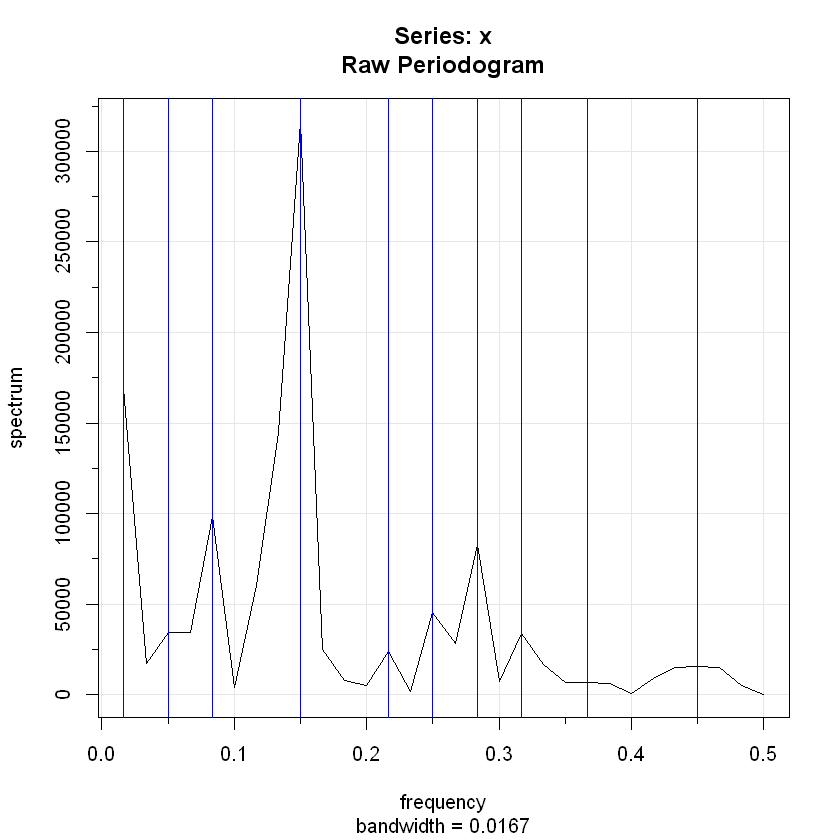

In [45]:
localMaxima <- function(x) {
    'Find indecies of local maxima of a sequential list. 

    Parameters
    ----------
    first: list of floats
        sequential y-vals of curve

    Returns
    -------
    list
        indecies of local maxima
    '
    
    y <- diff(c(-Inf, x)) > 0L
    rle(y)$lengths
    y <- cumsum(rle(y)$lengths)
    y <- y[seq.int(1L, length(y), 2L)]
    if (x[[1]] == x[[2]]) {
        y <- y[-1]
    }
    y
}

specMax <- function(x) {
    'Compute the spectral density of a time series x. 
    Return frequencies of spectral maxima in descending order.

    Parameters
    ----------
    first: list of floats
        time series data

    Returns
    -------
    list
        frequencies of spectral maxima
    '

    s <- mvspec(x)
    maxs.index <- localMaxima(s$spec)  # find indecies of local maxima
    maxs <- s$freq[maxs.index]  # frequency values of local maxima
    maxs.val <- s$spec[maxs.index]  # spec values of local maxima
    
    rv <- maxs[order(-maxs.val)]  # put maxs in decreasing order
    
    return(rv)
}

m <- specMax(df$New.Cases)
abline(v = m, col = 'blue')
m